Name: Telco Customer Churn Dataset

Description: This dataset contains information on customers of a telecom company, including demographics, account information, and services used. The target variable is Churn, which is either "Yes" or "No."

a machine learning model to predict the likelihood of customer churn. You’ll perform exploratory data analysis (EDA), preprocess the data, train a classification model, and evaluate its performance.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
cfeatures =["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
nfeatures = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[nfeatures] = df[nfeatures].apply(pd.to_numeric, errors='coerce')

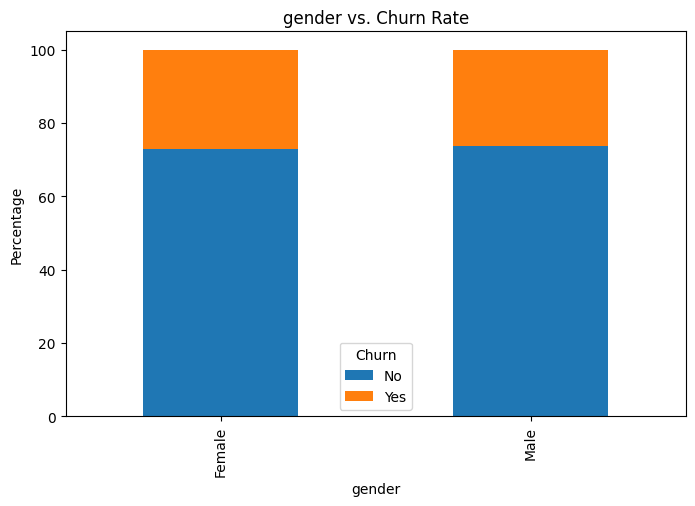

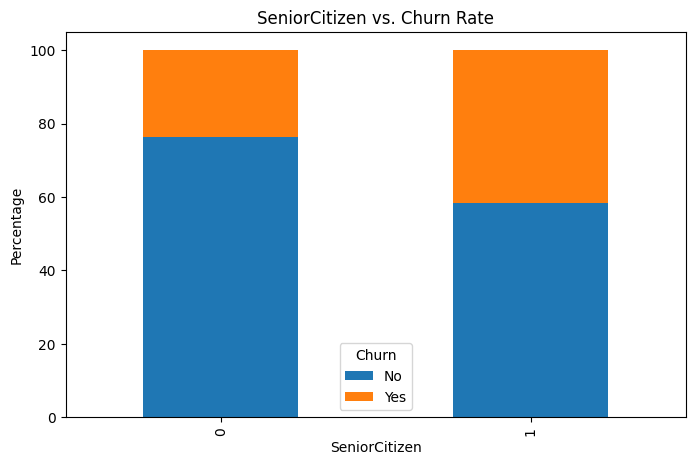

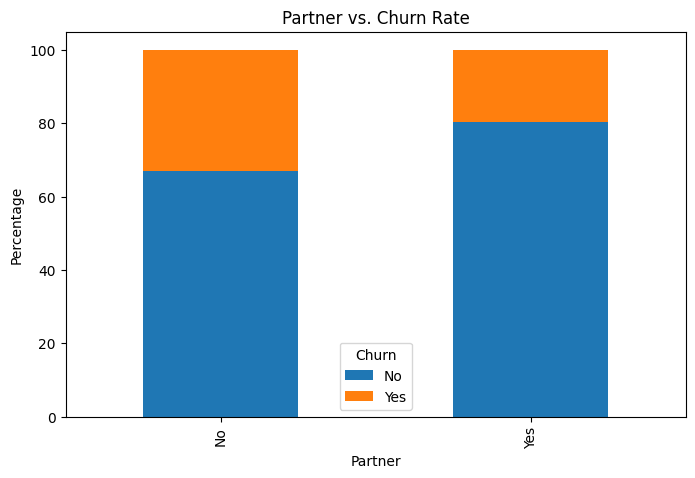

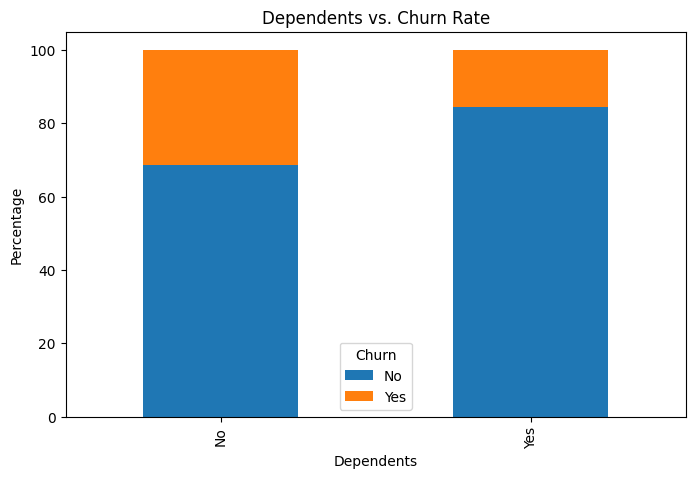

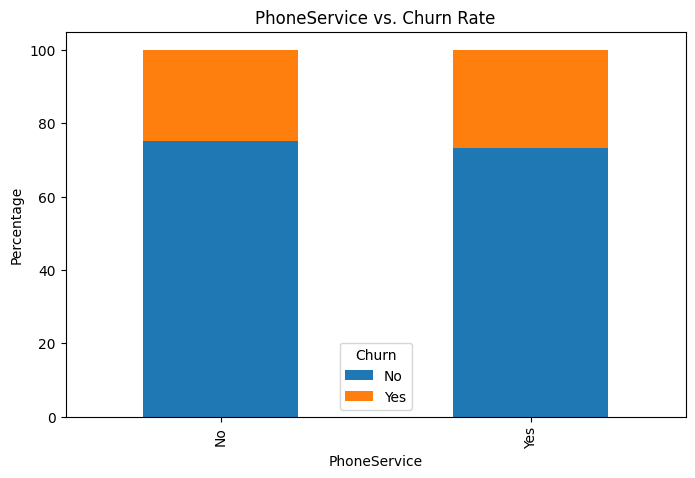

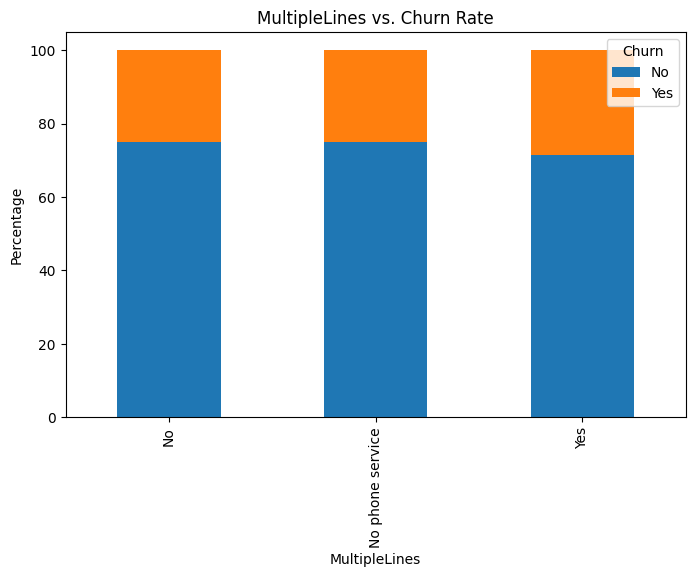

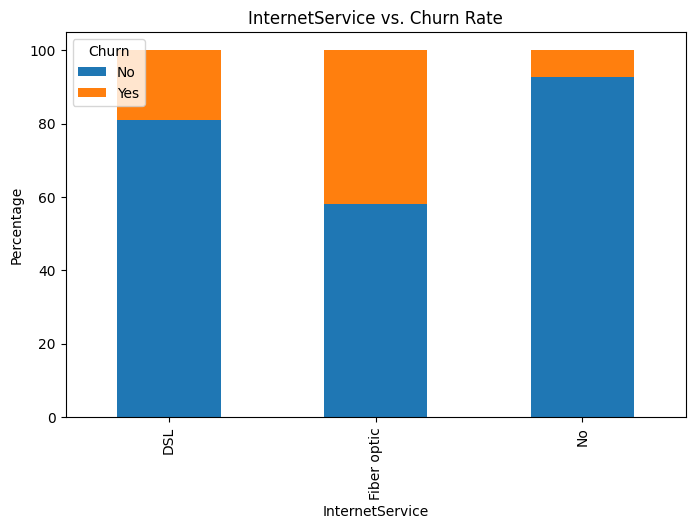

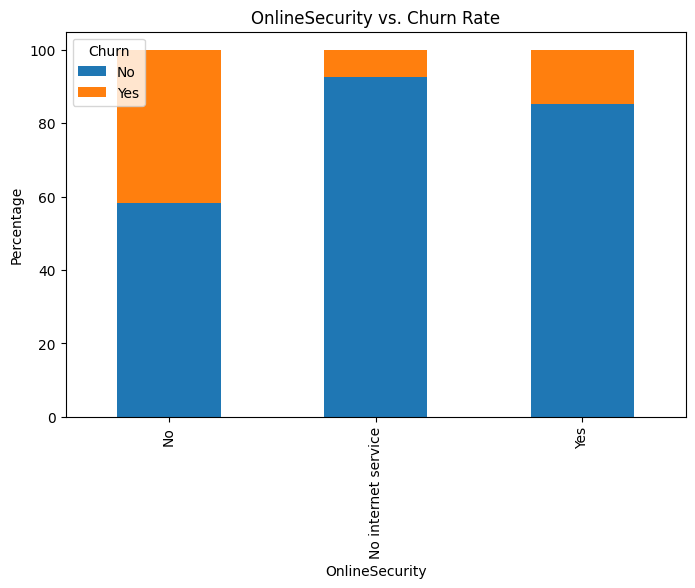

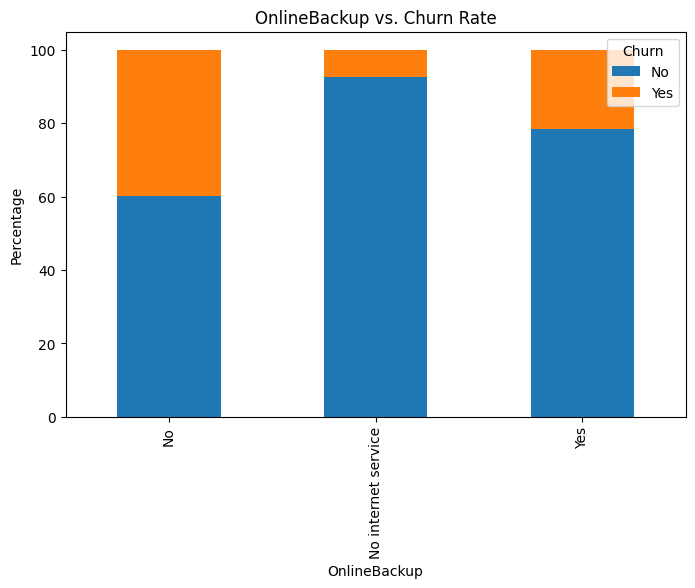

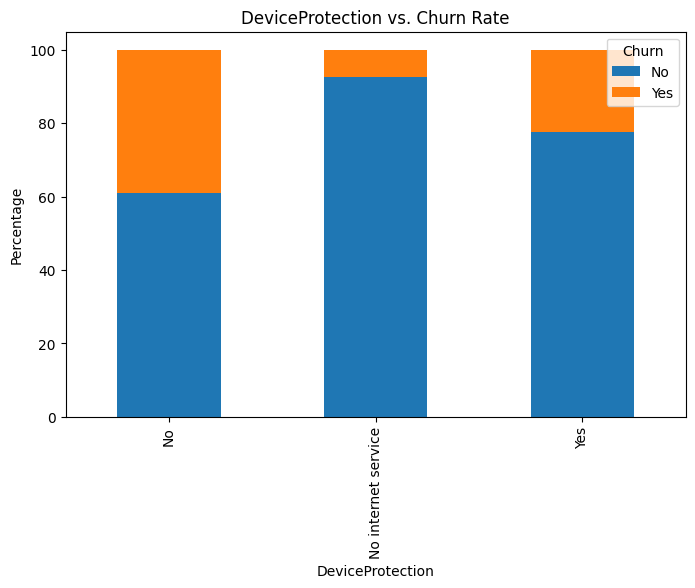

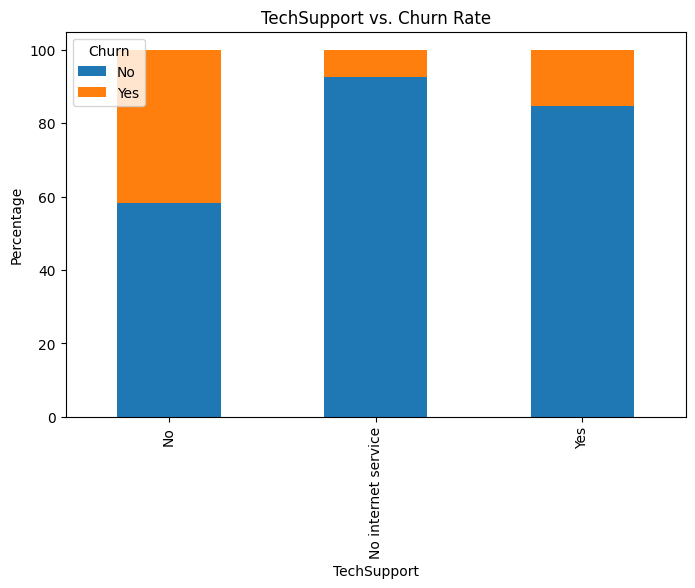

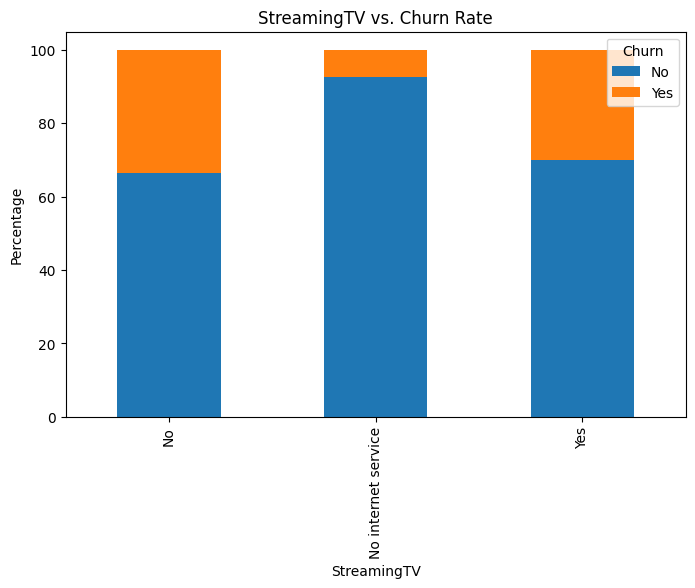

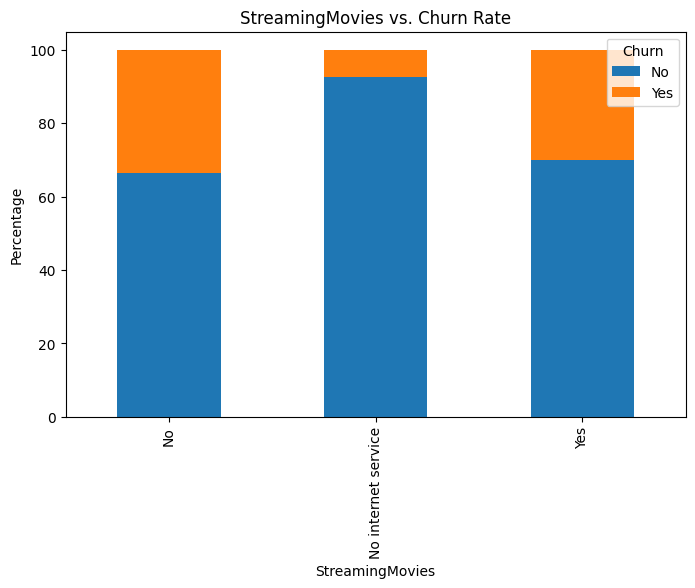

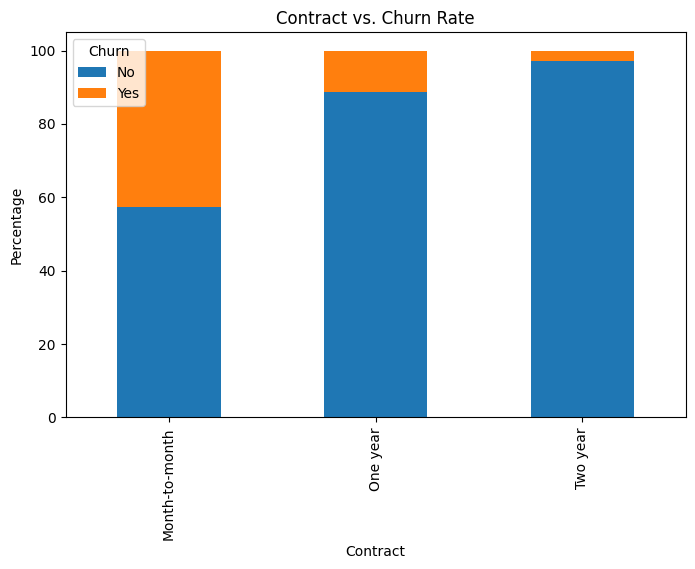

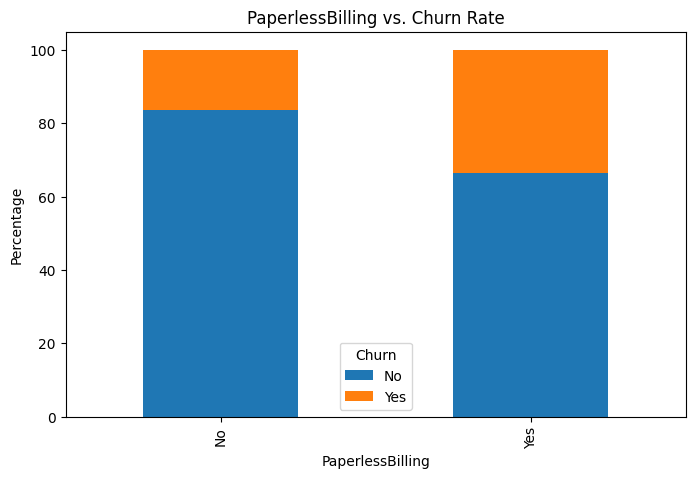

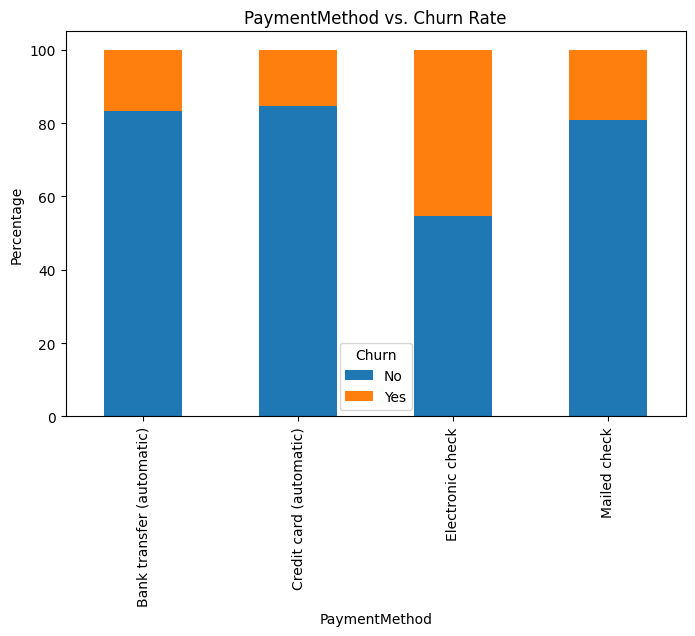

In [44]:
for feature in cfeatures:
    churn_rate = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack() * 100
    churn_rate.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f"{feature} vs. Churn Rate")
    plt.ylabel("Percentage")
    plt.show()


/var/folders/dt/_kd6szqs4gxct6stfgskt30m0000gn/T/ipykernel_46037/3448941827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette="viridis")


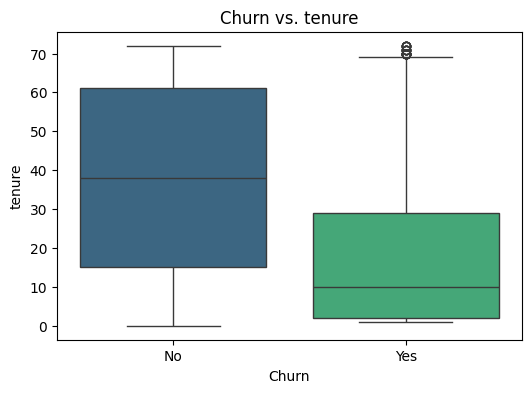

/var/folders/dt/_kd6szqs4gxct6stfgskt30m0000gn/T/ipykernel_46037/3448941827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette="viridis")


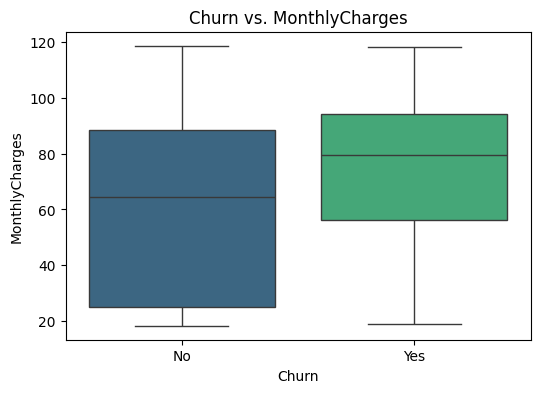

/var/folders/dt/_kd6szqs4gxct6stfgskt30m0000gn/T/ipykernel_46037/3448941827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette="viridis")


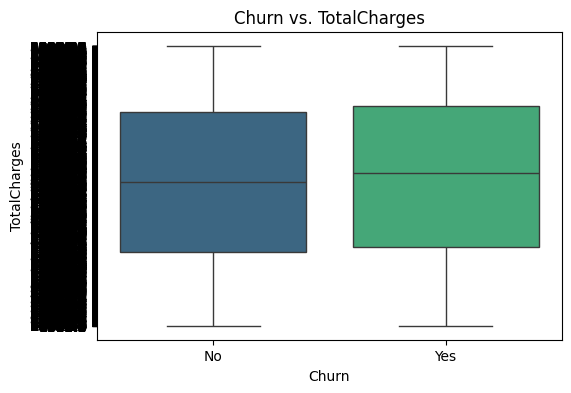

In [41]:
for feature in nfeatures:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=feature, data=df, palette="viridis")
    plt.title(f"Churn vs. {feature}")
    plt.show()

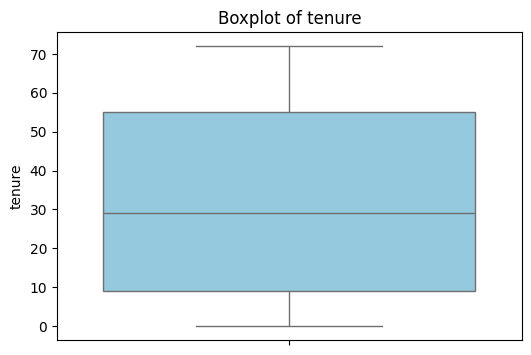

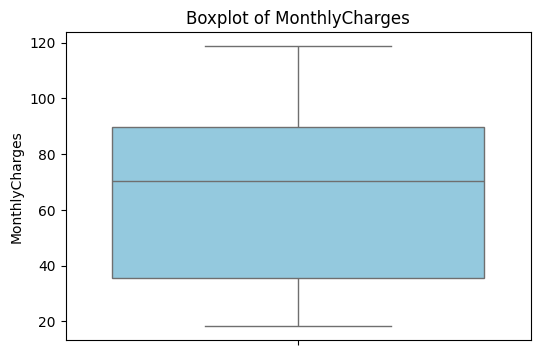

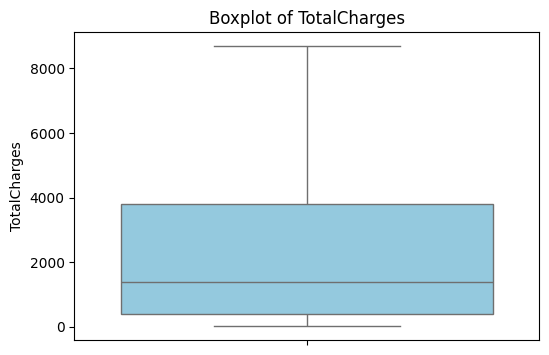

In [45]:
for feature in nfeatures:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[feature], color='skyblue')
    plt.title(f"Boxplot of {feature}")
    plt.show()

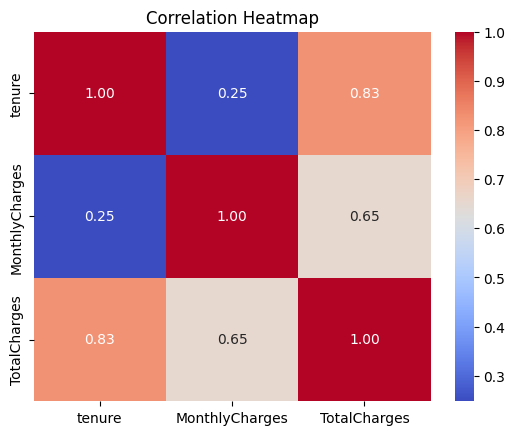

In [ ]:
corr = df[nfeatures].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



DATA PROCESSING